## DBScan

In [59]:
import sqlite3
import numpy as np
import pandas as pd
import  sys
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from numpy.random import default_rng
from typing import Union, Dict, Iterable, List

In [60]:
class DBScan:

    def __init__(self, points: np.array):
        self.points = points
        self.visited: np.ndarray = []
        self.groups: Dict[str: np.ndarray] = {}
        self.__distance = pd.DataFrame(data=cdist(self.points, self.points))
        self.not_visited: np.ndarray = list(self.__distance.index)

    def get_random_point(self):
        point = np.random.choice(self.not_visited, 1)
        index = self.not_visited.index(point)
        del self.not_visited[index]
        return point[0]

    def make_groups(self, e: float, n: int):

        def recursive_getting_points(df: pd.DataFrame, start_list: Iterable, point_list: Union[List, np.array]):
            for point_ in start_list:
                if point_ not in point_list and len(np.where(df.loc[point_, :] == True)[0]) != 1:
                    point_list.append(point_)
                    current_points = np.where(df.loc[point_, :] == True)[0]
                    point_list = recursive_getting_points(df, set(current_points) - set(point_list), point_list)
                elif point_ not in point_list:
                    point_list.append(point_)
            return point_list

        bool_df = self.__distance.apply(lambda x: x < e)
        i = 0
        while len(self.not_visited):
            point = self.get_random_point()
            list_op_points = [point]
            list_of_indexes = np.where(bool_df.loc[point, :] == True)[0]
            points_of_group = recursive_getting_points(bool_df, list_of_indexes, list_op_points)
            self.not_visited = list(set(self.not_visited) - set(points_of_group))
            if len(points_of_group) > n:
                self.groups[f'{i}'] = points_of_group
            else:
                self.groups[f'outlier {i}'] = points_of_group
            i += 1

        return self.groups


In [62]:
sql_tour = """
SELECT lat, lng
FROM
    tourists INNER JOIN zip_codes ON
    tourists.zip = zip_codes.zip
ORDER BY id
;"""
sql_restaurants = """
SELECT lat, lng
FROM 
	restaurants INNER JOIN zip_codes ON
	restaurants.zip = zip_codes.zip 
ORDER BY id
;"""
sys.setrecursionlimit(2000)
# print(sys.getrecursionlimit())
con = sqlite3.Connection("data/hw2.sqlite")
restaurants = pd.read_sql(sql=sql_restaurants, con=con)
tourists = pd.read_sql(sql=sql_tour, con=con)

In [63]:
u = DBScan(restaurants)
d = u.make_groups(0.14, 5)
# print(u.groups)
for key, value, n in zip(d.keys(), d.values(), list(range(len(d.values())))):
    print('-'*50, n, '-'*50)
    if key[0] == 'o':
        print('OUTLIER!!!')
    print(value, end='\n\n')

-------------------------------------------------- 0 --------------------------------------------------
[880, 504, 516, 771, 773, 897, 515, 780, 781, 776, 708, 546, 532, 768, 512, 769, 642, 545, 644, 742, 609, 916, 647, 641, 656, 646, 519, 907, 525, 909, 928, 784, 660, 789, 788, 662, 535, 531, 521, 534, 577, 668, 659, 778, 864, 664, 783, 706, 932, 903, 613, 995, 665, 799, 930, 676, 538, 921, 666, 794, 925, 804, 549, 683, 686, 689, 949, 952, 681, 741, 962, 698, 582, 608, 940, 927, 537, 775, 899, 655, 674, 837, 707, 671, 540, 868, 898, 785, 896, 770, 522, 544, 779, 651, 652, 653, 637, 919, 526, 915, 888, 533, 663, 792, 509, 923, 991, 677, 845, 964, 524, 594, 738, 583, 917, 910, 672, 834, 548, 678, 560, 998, 967, 711, 996, 968, 618, 733, 797, 616, 945, 872, 714, 587, 555, 704, 803, 550, 693, 551, 670, 871, 585, 650, 557, 870, 745, 860, 617, 737, 963, 611, 966, 732, 605, 808, 976, 600, 955, 873, 767, 688, 631, 937, 710, 875, 861, 592, 624, 511, 720, 851, 947, 619, 721, 573, 904, 848, 970, 

In [64]:
restaurants['type'] = 0
restaurants
for key, values in d.items():
    for value in values:
        restaurants.loc[value, 'type'] = key

In [65]:
restaurants

,lat,lng,type
0,38.932905,-75.414243,1
1,38.833749,-75.418738,1
2,39.133371,-75.971980,1
3,40.093466,-74.988368,3
4,39.395894,-76.008214,1
...,...,...,...
1995,40.927847,-75.584565,0
1996,41.001789,-75.464955,0
1997,40.792696,-75.808319,0
1998,41.826272,-76.092599,2


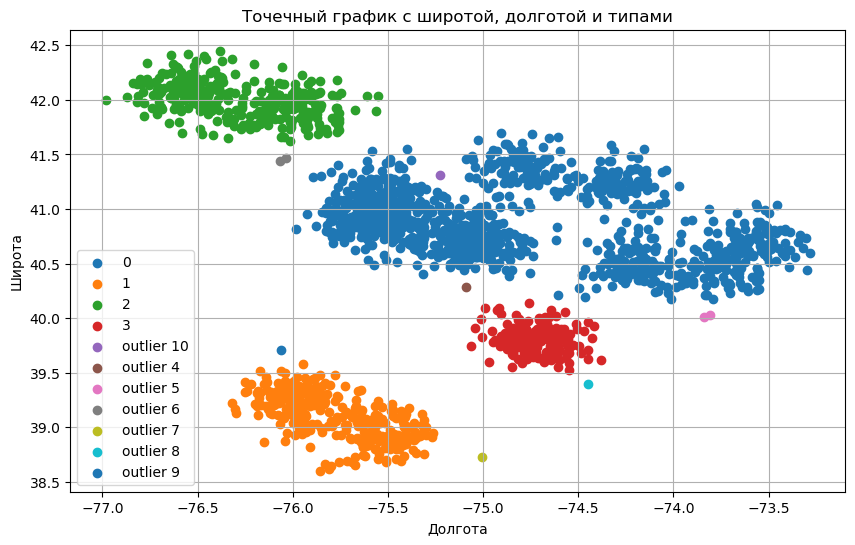

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for type_label, group in restaurants.groupby('type'):
    plt.scatter(group['lng'], group['lat'], label=type_label)

plt.title("Точечный график с широтой, долготой и типами")
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.legend()
plt.grid(True)
plt.show()

### euclidean_distance

In [16]:
import numpy as np


point_1 = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]])
point_2 = np.array([[3, 3, 3], [3, 3, 3], [3, 3, 3], [3, 3, 3]])
print(np.square(point_2 - point_1))


def euclidean_distance(XA: np.ndarray, XB: np.ndarray) -> np.ndarray:
    return np.array([[np.sqrt(np.sum(np.square(i - j))) for i in XA] for j in XB])


print(euclidean_distance(point_2, point_1))


[[9 9 9]
 [9 9 9]
 [9 9 9]
 [9 9 9]]
[[5.19615242 5.19615242 5.19615242 5.19615242]
 [5.19615242 5.19615242 5.19615242 5.19615242]
 [5.19615242 5.19615242 5.19615242 5.19615242]
 [5.19615242 5.19615242 5.19615242 5.19615242]]


## KNN

In [17]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from numpy.random import default_rng
from typing import Union


In [18]:
class Hello:

    def __init__(self, base: np.ndarray, entities: np.ndarray):
        self.base = pd.DataFrame(base)
        self.entities = pd.DataFrame(entities)

    def knn(self, ax_0: int, ax_1: int, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        if flag:
            return pd.DataFrame(data=np.argsort(cdist(self.base, self.entities), axis=1)[:ax_0, :ax_1])
        return np.argsort(cdist(self.base, self.entities), axis=1)[:ax_0, :ax_1]

    @staticmethod
    def get_random_centroids(amount_of_points: int, x: np.ndarray, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        if isinstance(x, np.ndarray):
            x = pd.DataFrame(data=x)
            x = x.sample(amount_of_points)
            if flag:
                return x
            return x.to_numpy()
        elif isinstance(x, pd.DataFrame):
            return x.sample(amount_of_points)

    def make_random_centroids(self, amount_of_points, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        rng = default_rng()
        data = {f'{i}': ((max(self.base[i]) - min(self.base[i])) * rng.random(amount_of_points) + min(self.base[i]))
                for i in self.entities.columns
                }
        df = pd.DataFrame(data=data)
        if flag:
            return pd.DataFrame(data=data)
        return df.to_numpy()

    def find_closest_centroids(self, centroids: np.ndarray, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        if flag:
            return pd.DataFrame(data=np.argsort(cdist(self.entities, centroids), axis=1)[:, :1])
        return np.argsort(cdist(self.entities, centroids), axis=1)[:, 0]

    def group_by_centroids_and_update(self, groups: np.ndarray, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        data = {f'{i}': [] for i in self.entities.columns}
        for point in set(groups):
            arr_of_ind_of_point = np.where(groups == point)
            current_entities = self.entities.iloc[arr_of_ind_of_point]
            average_of_columns = current_entities.mean()
            for i in average_of_columns.index:
                data[i].append(average_of_columns[i])
        res = pd.DataFrame(data=data)
        if flag:
            return res
        return res.to_numpy()

    def optimize_centroids(self, centroids: np.ndarray, flag: bool = False) -> Union[pd.DataFrame, np.ndarray]:
        while True:
            fig, ax = plt.subplots(figsize=(11, 5))
            _ = ax.scatter(x=self.entities["lat"], y=self.entities["lng"], s=10, c="firebrick", edgecolors="black",
                           linewidths=0.5, alpha=0.5)
            df = pd.DataFrame(centroids, columns=['lat', 'lng'])
            _ = ax.scatter(x=df["lat"], y=df["lng"], s=10, c="blue",
                           linewidths=3, alpha=1)
            plt.show()
            plt.close(fig)
            # print(pd.DataFrame(centroids, columns=['lat', 'lng']))
            groups = self.find_closest_centroids(centroids=centroids, flag=False)
            current_centroids = self.group_by_centroids_and_update(groups=groups, flag=False)
            # print(len(current_centroids))
            # если мы хотим добавить сентроиды(при условии что их стало меньше), если нет,
            # то просто убираем этот if и сентроидов будет меньше
            if len(centroids) != len(current_centroids):
                # print('enter')
                buf = self.make_random_centroids(len(centroids) - len(current_centroids), False)
                current_centroids = np.concatenate((current_centroids, buf))
            # print(len(current_centroids))
            # print(pd.DataFrame(centroids, columns=['lat', 'lng']))
            if np.array_equal(current_centroids, centroids):
                if flag:
                    return pd.DataFrame(data=current_centroids)
                return current_centroids
            centroids = current_centroids


[[ 294   79  425  345  116]
 [1356 1145 1312 1148 1401]
 [1372 1380 1016 1425 1127]]
[[ 39.57605715 -76.37578454]
 [ 41.64569871 -74.10548943]
 [ 41.09488312 -75.05593343]
 [ 39.4550094  -75.08410236]
 [ 38.76649546 -75.72863176]
 [ 40.67492945 -75.91569888]
 [ 40.80873273 -75.68072898]
 [ 39.78681108 -76.28598746]
 [ 39.63040743 -75.88011993]
 [ 39.20805649 -75.25610031]
 [ 41.52175428 -75.43762603]
 [ 40.72854853 -76.19807506]
 [ 39.50925419 -76.48191379]
 [ 41.55614139 -74.97851341]
 [ 41.14320848 -75.76738074]
 [ 39.13000582 -75.11905144]
 [ 39.50006429 -76.44694236]
 [ 38.93765216 -73.96528854]
 [ 39.76670898 -76.28842507]
 [ 40.47979392 -73.87345201]]


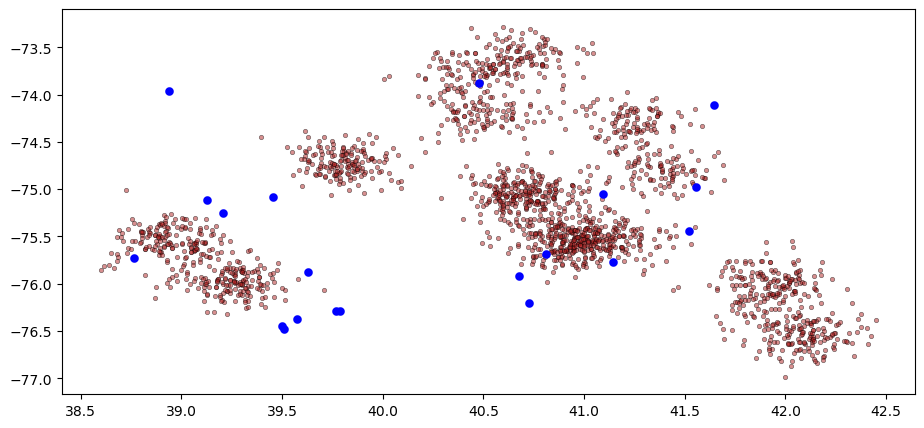

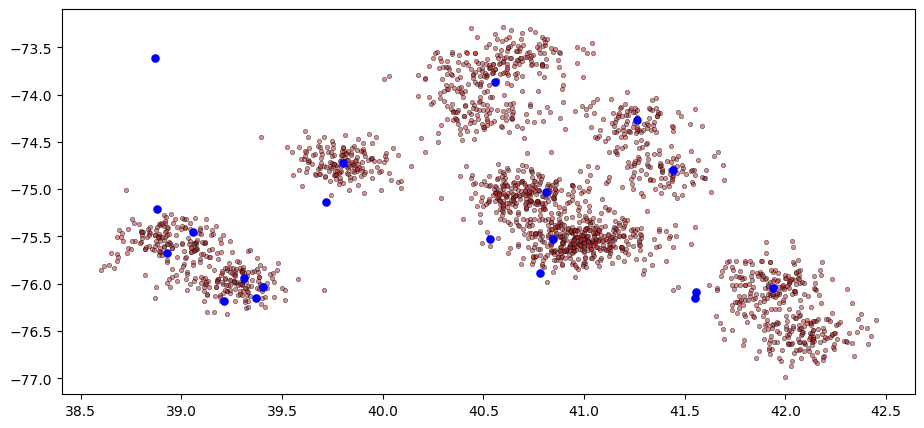

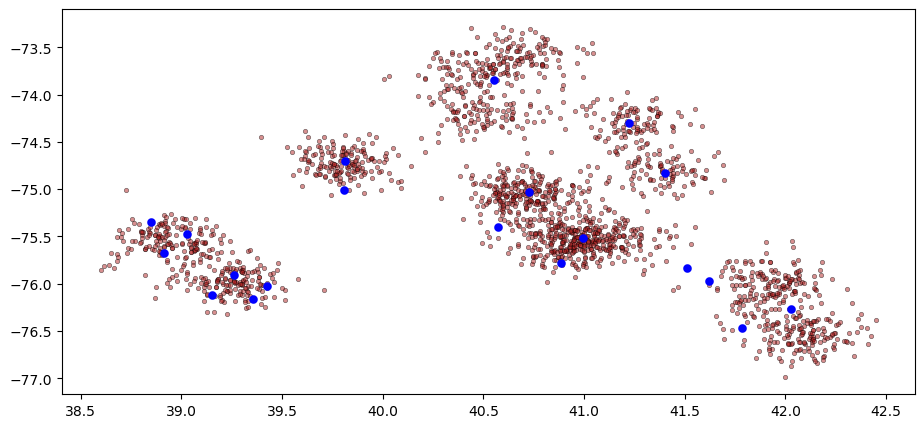

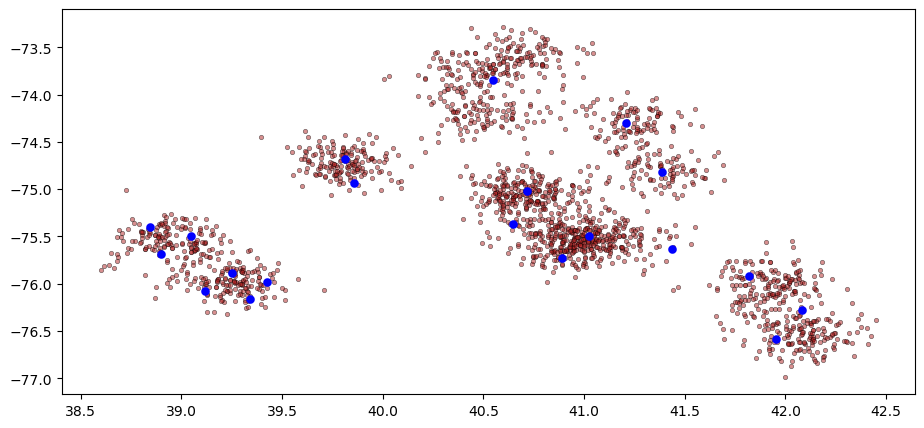

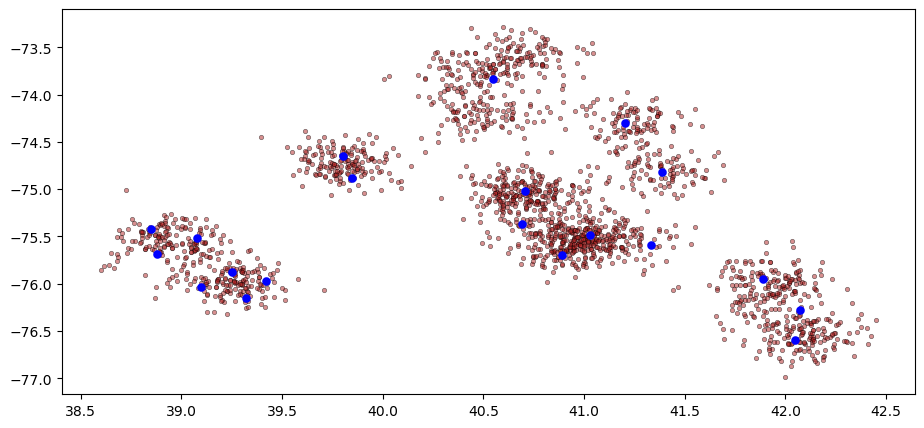

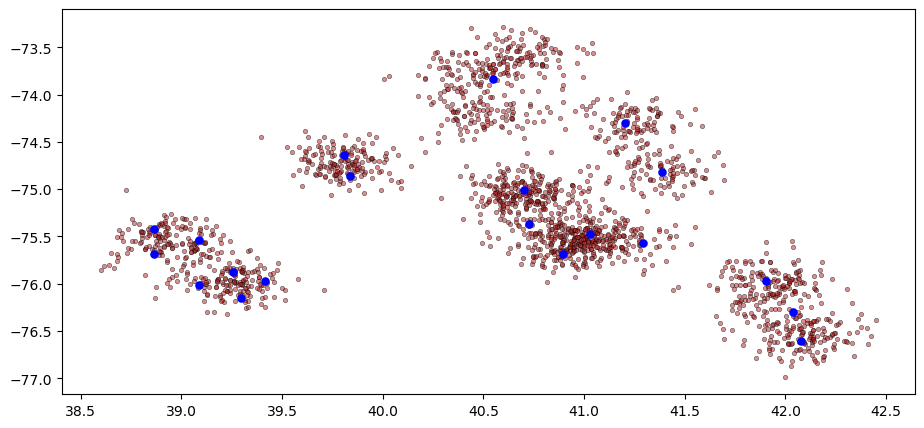

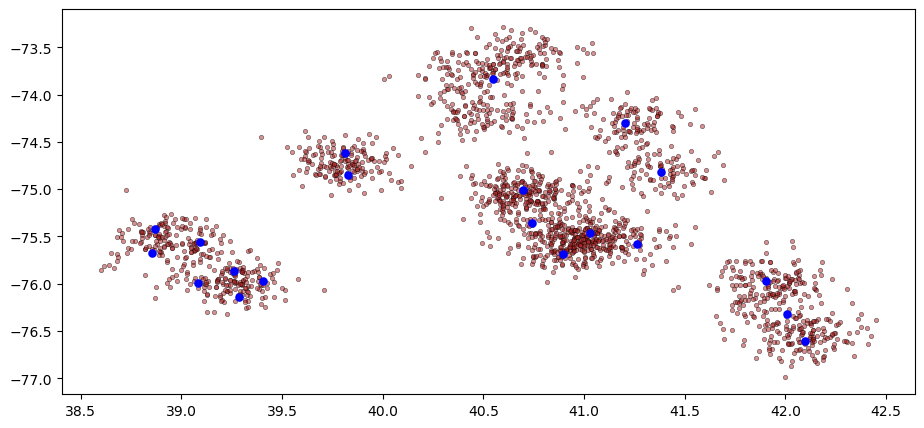

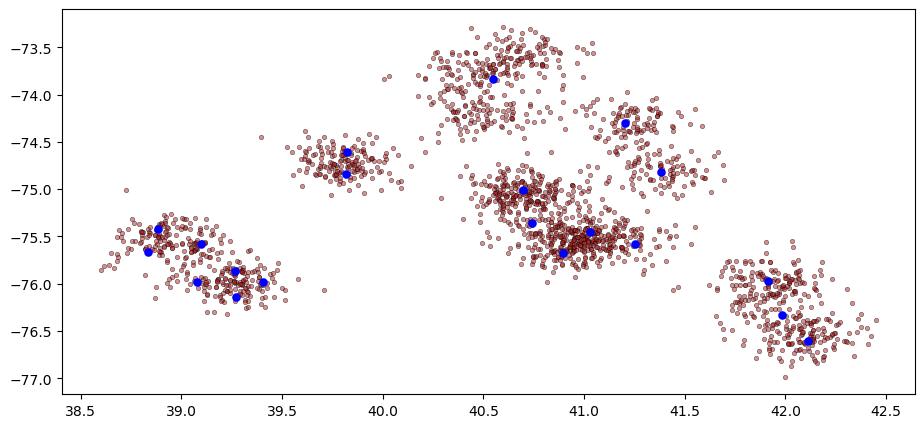

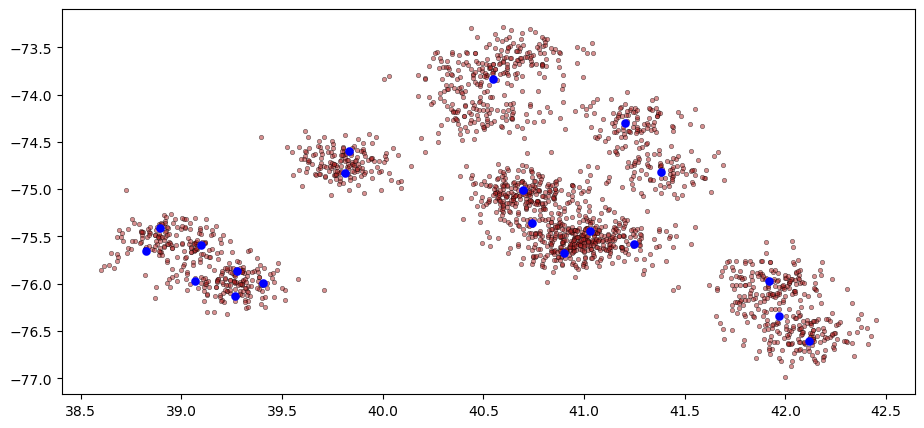

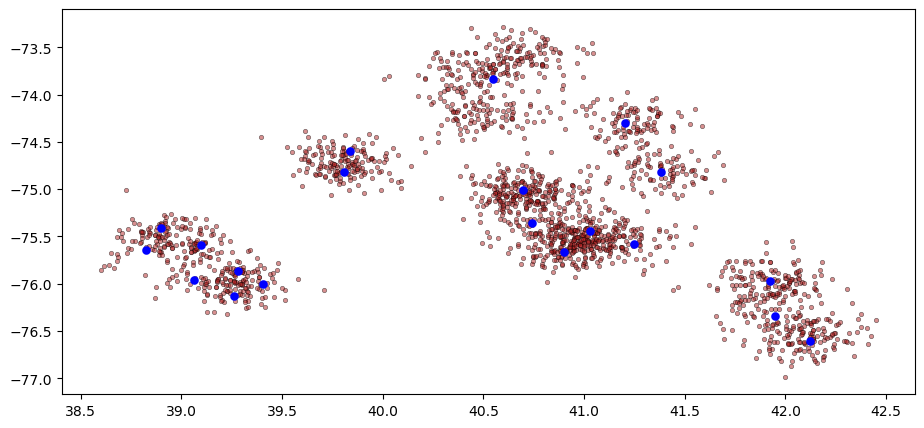

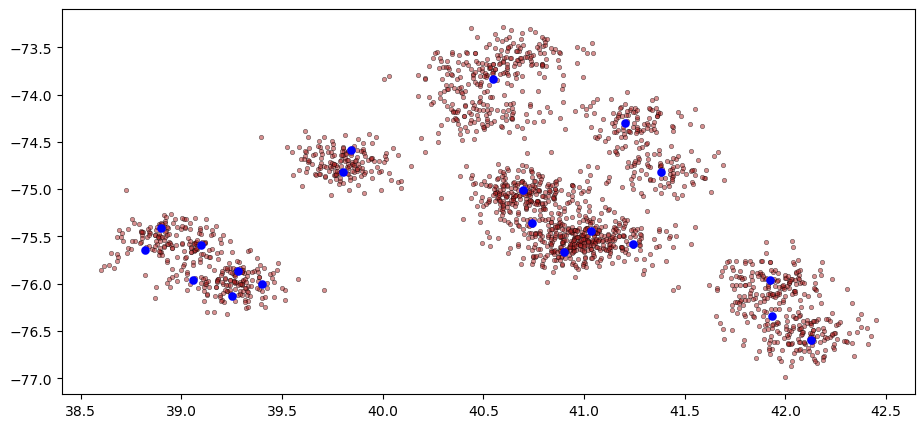

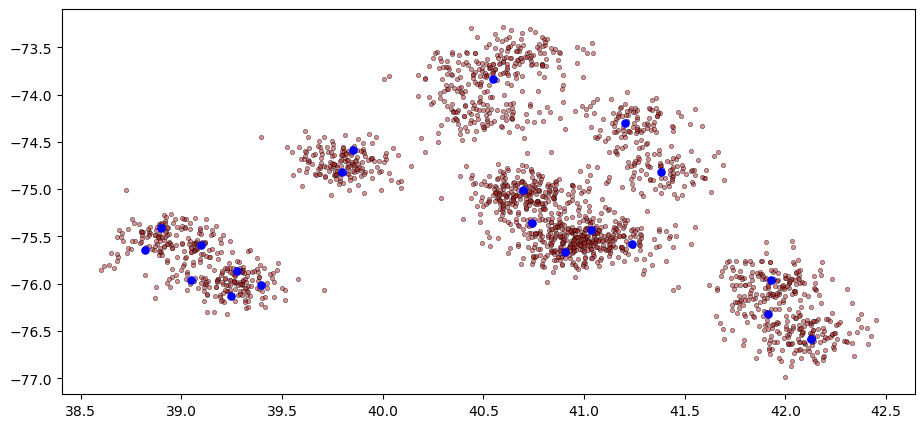

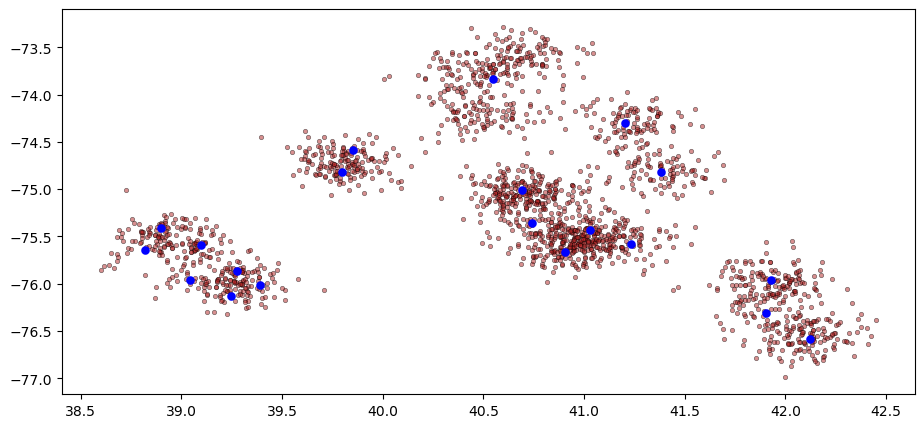

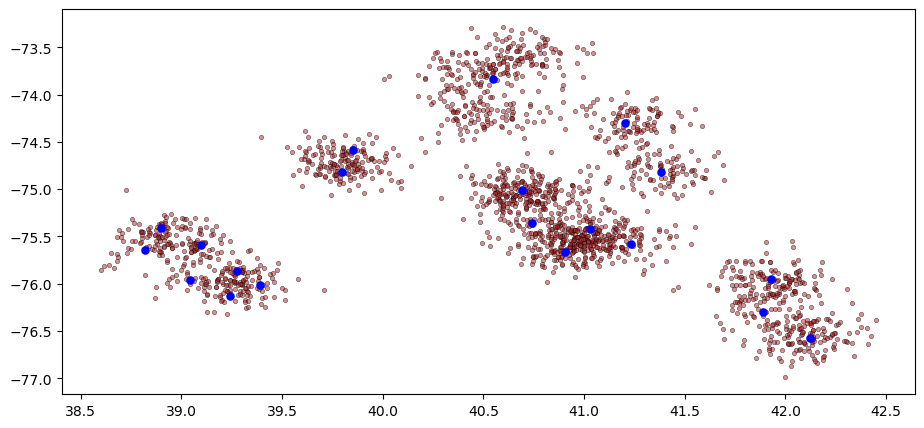

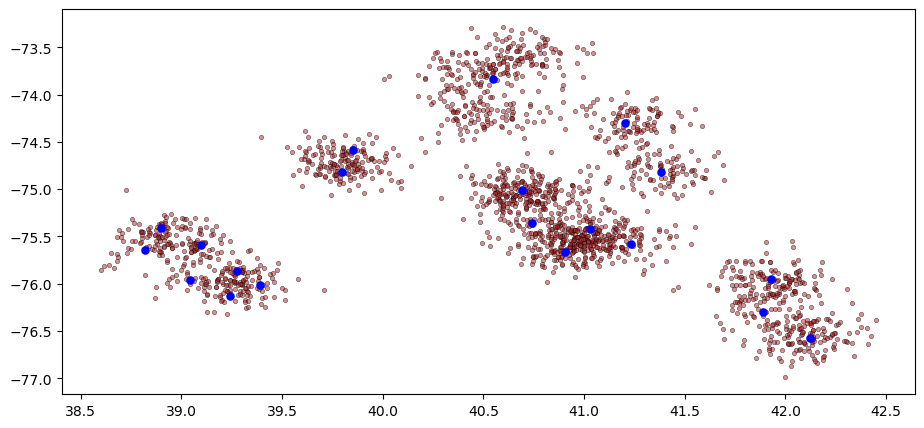

[[ 39.24389907 -76.1337441 ]
 [ 41.20530125 -74.29595324]
 [ 40.6936065  -75.0089365 ]
 [ 39.85189043 -74.58665839]
 [ 38.82244031 -75.63770193]
 [ 40.90637433 -75.66085037]
 [ 41.03178517 -75.42316243]
 [ 39.27571267 -75.86576525]
 [ 39.09776729 -75.59356925]
 [ 41.88736347 -76.29740529]
 [ 41.38262751 -74.81467082]
 [ 41.23473304 -75.57950997]
 [ 38.89900619 -75.40600979]
 [ 39.04155702 -75.95931024]
 [ 40.55014472 -73.83258159]
 [ 39.39124001 -76.01241466]
 [ 40.74045323 -75.36082043]
 [ 39.79846148 -74.81565207]
 [ 42.12281478 -76.57544369]
 [ 41.92940911 -75.95079403]]


In [19]:
a = Hello(tourists, restaurants)
f = a.knn(3, 5)
print(f)
f = a.make_random_centroids(20, False)
print(f)
itog = a.optimize_centroids(f)
print(itog)
